<div style="background-color:#e6f0ff; padding:20px; border-radius:10px;">

<p align="center">
  <img src="https://ensai.fr/wp-content/uploads/2019/07/ENSAE-Dakar-logo.png" alt="Logo" width="50">
</p>

<h1 style="text-align:center; font-weight:bold; font-size:28px;">
TP CLUSTERING
</h1>

<div style="display: flex; justify-content:space-between; font-size:16px; margin-top:20px;">
  <div><strong> Étudiant :</strong> Larry SANDJO, ISE2 </div>
  <div style="text-align:right;"><strong> Enseignant :</strong> Mously DIAW </div>
</div>
</div>

## Import librairies

In [54]:
%matplotlib inline

from time import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification, load_digits
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from yellowbrick.cluster import InterclusterDistance, SilhouetteVisualizer, KElbowVisualizer


pd.set_option("display.max_columns", None)

## Load the dataset

We will start by loading the digits dataset. This dataset contains handwritten digits from 0 to 9. In the context of clustering, one would like to group images such that the handwritten digits on the image are the same.

In [2]:
digits = load_digits()  # Dimensionality: 64 features

X, labels = digits.data, digits.target
images = digits.images

# column name for 64
column_names = [f"X{i}" for i in range(64)]

data = pd.DataFrame(X, columns=column_names).assign(label=labels)

(n_samples, n_features), n_digits = X.shape, np.unique(labels).size

print(f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}")

# digits: 10; # samples: 1797; # features 64


In [3]:
data.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [4]:
data

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,16.0,14.0,12.0,16.0,3.0,0.0,0.0,4.0,16.0,6.0,3.0,16.0,4.0,0.0,0.0,0.0,12.0,16.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,4.0,4.0,16.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,5.0,0.0,0.0,0.0,5.0,7.0,7.0,16.0,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,16.0,15.0,12.0,16.0,1.0,0.0,0.0,3.0,16.0,7.0,0.0,13.0,6.0,0.0,0.0,4.0,16.0,0.0,0.0,10.0,8.0,0.0,0.0,8.0,16.0,0.0,0.0,14.0,6.0,0.0,0.0,5.0,16.0,7.0,9.0,16.0,5.0,0.0,0.0,1.0,15.0,16.0,16.0,16.0,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,13.0,16.0,8.0,2.0,1.0,0.0,0.0,0.0,16.0,15.0,10.0,16.0,5.0,0.0,0.0,0.0,8.0,16.0,16.0,7.0,0.0,0.0,0.0,0.0,9.0,16.0,16.0,4.0,0.0,0.0,0.0,0.0,16.0,14.0,16.0,15.0,0.0,0.0,0.0,0.0,15.0,15.0,15.0,16.0,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,14.0,16.0,16.0,15.0,1.0,0.0,0.0,4.0,16.0,7.0,3.0,16.0,7.0,0.0,0.0,5.0,16.0,10.0,7.0,16.0,4.0,0.0,0.0,0.0,5.0,14.0,14.0,16.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,2.0,0.0,0.0,0.0,4.0,7.0,7.0,16.0,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


## EDA

C:\Users\Larry\AppData\Local\Temp\ipykernel_23372\3374211802.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=data, palette='tab10')


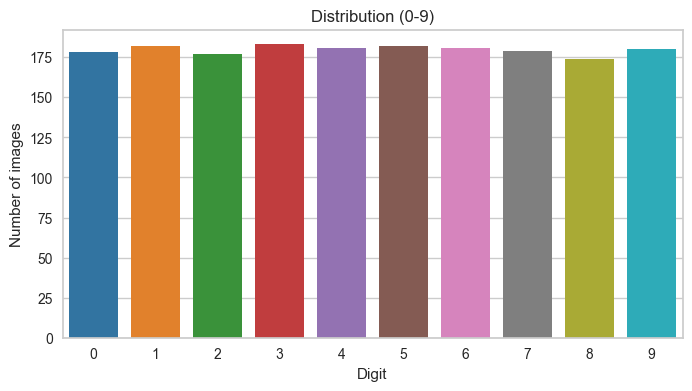

In [5]:
plt.figure(figsize=(8, 4))
sns.countplot(x='label', data=data, palette='tab10')

plt.title("Distribution (0-9)")
plt.xlabel("Digit")
plt.ylabel("Number of images")
plt.show()

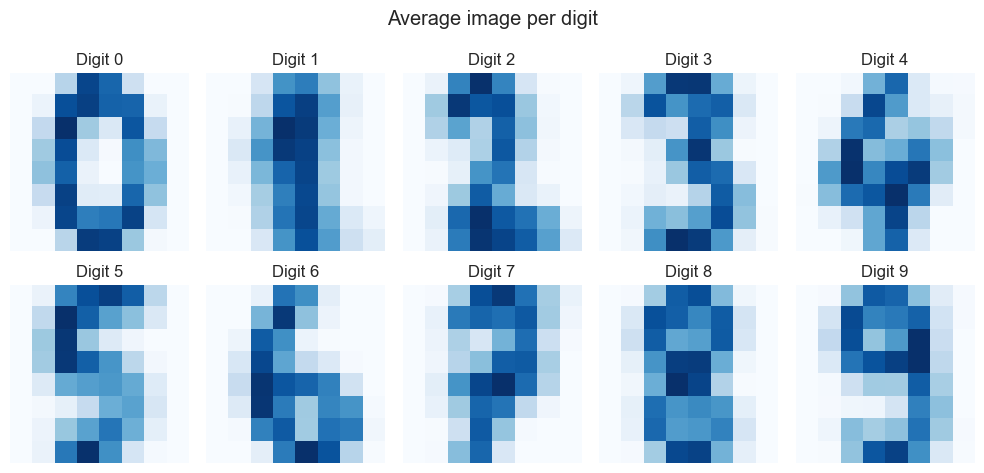

In [6]:
# mean by digit
mean_images = np.zeros((10, 64))  # 64 pixels
for i in range(10):
    mean_images[i] = data.loc[data.label == i, column_names].mean(axis=0)


fig, axs = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axs.flat):
    ax.imshow(mean_images[i].reshape(8, 8), cmap='Blues')
    ax.set_title(f"Digit {i}")
    ax.axis('off')
plt.suptitle("Average image per digit")
plt.tight_layout()
plt.show()

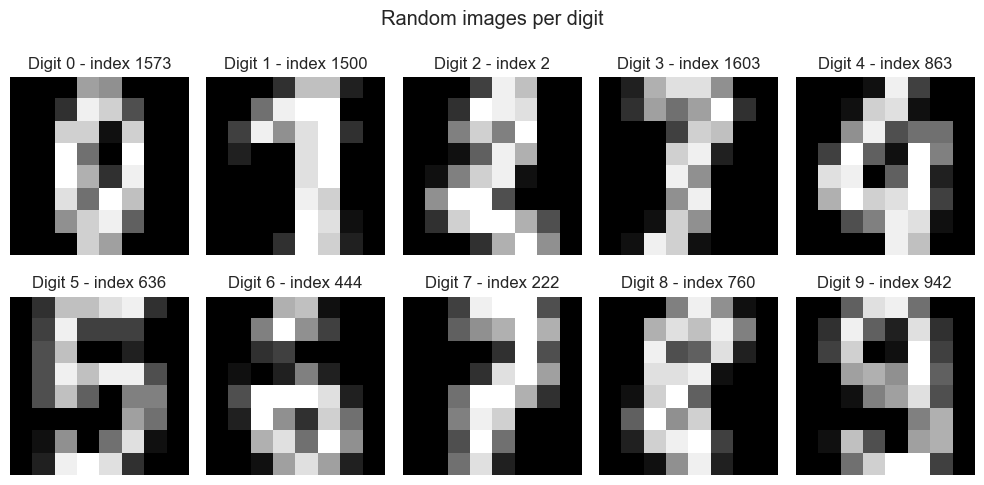

In [7]:
fig, axs = plt.subplots(2, 5, figsize=(10, 5))
plt.subplots_adjust(left=0.01, right=0.99, bottom=0.01, top=0.91, hspace=0.5)

for i, label in enumerate(np.unique(labels)):
    ax = axs[i // 5, i % 5]
    # Random choice by digit
    idx = np.random.choice(np.where(labels == label)[0])
    ax.imshow(images[idx], cmap='gray')
    ax.set_title(f"Digit {label} - index {idx}")
    ax.axis('off')

plt.suptitle("Random images per digit")
plt.tight_layout()
plt.show();

## Define our evaluation benchmark

We will first our evaluation benchmark. During this benchmark, we intend to compare different initialization methods for KMeans. Our benchmark will:

create a pipeline which will scale the data using a StandardScaler;

train and time the pipeline fitting;

measure the performance of the clustering obtained via different metrics.


In [8]:
def bench_k_means(kmeans, name, data, labels):
    """Benchmark to evaluate the KMeans initialization methods.

    Parameters
    ----------
    kmeans : KMeans instance
        A :class:`~sklearn.cluster.KMeans` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """
    t0 = time()
    estimator = make_pipeline(MinMaxScaler(), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(
            data,
            estimator[-1].labels_,
            metric="euclidean",
            sample_size=300,
        )
    ]


    # Show the results
    formatter_result = (
        "{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
    )
    print(formatter_result.format(*results))

### Run benchmark

In [9]:
print(82 * "_")
print("init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tsilhouette")

kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="k-means++", data=X, labels=labels)

kmeans = KMeans(init="random", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="random", data=X, labels=labels)

# pca = PCA(n_components=n_digits).fit(X)

pca = PCA(n_components=.99).fit(X) # Au lieu de digit on peut mettre .95 pour avoir 95% de l'information

# kmeans = KMeans(init=pca.components_, n_clusters=n_digits, n_init=4) # n_init = nombre d'iterations pour avoir les centroides

kmeans = KMeans(init="k-means++",
                n_clusters=n_digits, n_init=4)

# bench_k_means(kmeans=kmeans, name="PCA-based", data=X, labels=labels)

bench_k_means(kmeans=kmeans, name="PCA-based", data=pca.transform(X), labels=labels)

print(82 * "_")

print(f"PCA n components:{pca.n_components_}")

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	silhouette
k-means++	0.593s	4647	0.739	0.747	0.743	0.669	0.171
random   	0.031s	4648	0.735	0.742	0.738	0.667	0.177
PCA-based	0.063s	1306	0.712	0.719	0.715	0.628	0.156
__________________________________________________________________________________
PCA n components:41


## Optimal number of clusters

In [10]:
scaler = MinMaxScaler()  # StandardScaler()
X_scaled = scaler.fit_transform(X)

### Elbow method

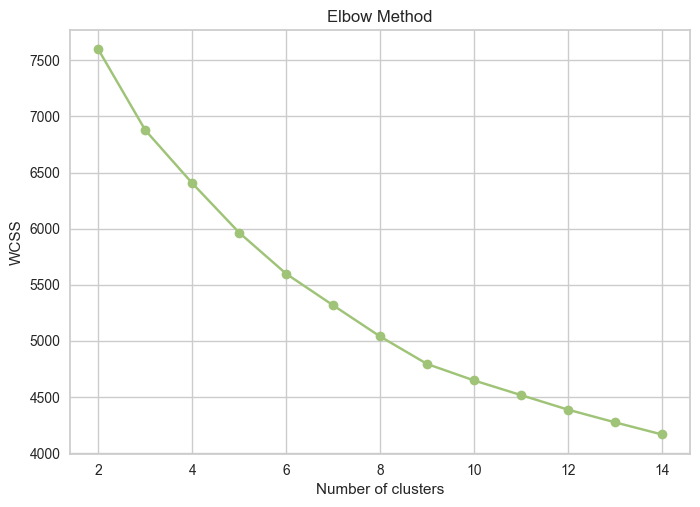

In [11]:
wcss = []  # Within-Cluster Sum of Squares

k_grid = range(2, 15)
for i in k_grid:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(k_grid, wcss, 'go-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Yellow brick lib

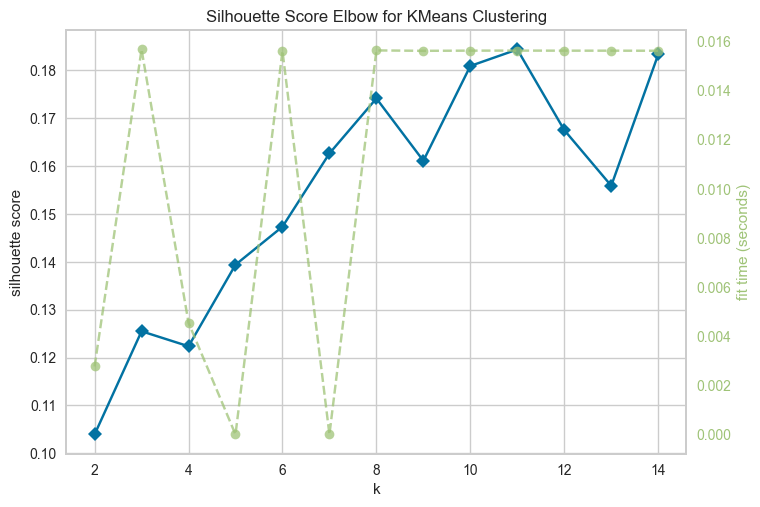

In [12]:
# Instantiate the clustering model and visualizer

# - **distortion**: mean sum of squared distances to centers
# - **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
# - **calinski_harabasz**: ratio of within to between cluster dispersion


visualizer = KElbowVisualizer(KMeans(),
                              metric='silhouette',  # possible values: calinski_harabasz, distortion, silhouette
                              distance_metric="euclidean", # options allowed by sklearn's metrics.pairwise.pairwise_distances
                              k=k_grid,
                              timings=True,
                              locate_elbow=False, # True or False
                             )

visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show();       # Finalize and render the figure

## Visualize the results on PCA-reduced data


### Profiling: cluster persona

In [13]:
reduced_data = PCA(n_components=2).fit_transform(X)
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
kmeans.fit(reduced_data)

kmean_labels = kmeans.labels_

In [14]:
data["cluster"] = kmean_labels
data.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,label,cluster
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0,8
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1,6
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2,0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3,2
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4,3


In [15]:
# Mapping cluster => label
contingency_table = pd.crosstab(data["cluster"], data["label"])
contingency_table
# le label qui a la plus grande valeur est attribuée au cluster : par exemple le cluster 1 c'est le chiffre 7

label,0,1,2,3,4,5,6,7,8,9
cluster,,,,,,,,,,
0,0,49,31,3,1,59,1,30,78,10
1,17,0,0,0,6,5,131,0,0,0
2,1,0,3,90,0,29,0,0,0,117
3,1,0,0,0,102,1,31,0,0,0
4,0,18,1,0,68,5,12,4,6,3
5,0,0,114,63,0,4,0,0,4,9
6,0,89,2,0,1,4,0,34,8,1
7,4,22,15,14,0,48,0,0,54,31
8,155,0,0,0,0,4,6,0,0,0


In [16]:
major_digit = contingency_table.idxmax(axis=1)
print(major_digit)

cluster
0    8
1    6
2    9
3    4
4    4
5    2
6    1
7    8
8    0
9    7
dtype: int64


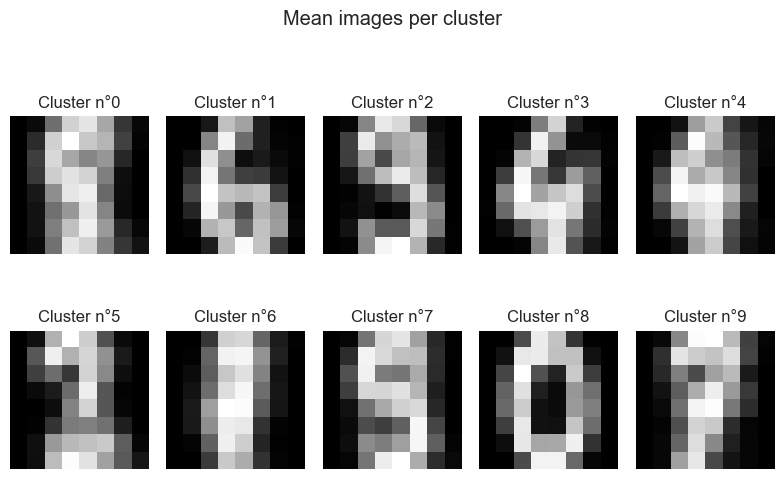

In [17]:
for cluster_id in range(n_digits):
    cluster_indices = np.where(kmean_labels == cluster_id)
    cluster_images = X[cluster_indices]
    mean_image = cluster_images.mean(axis=0).reshape(8, 8)

    plt.subplot(2, 5, cluster_id + 1)
    plt.imshow(mean_image, cmap='gray')
    plt.title(f"Cluster n°{cluster_id}")
    plt.axis('off')

plt.suptitle("Mean images per cluster")
plt.tight_layout()
plt.show()

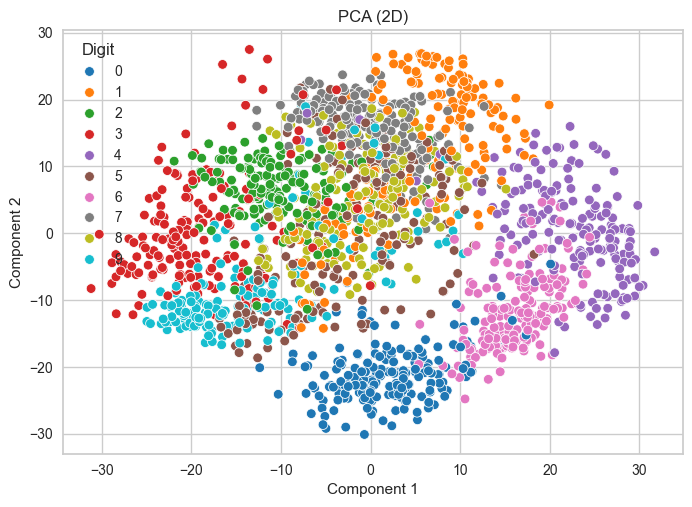

In [18]:
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=data.label, palette='tab10', legend='full')
plt.title("PCA (2D)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(title="Digit")
plt.show()


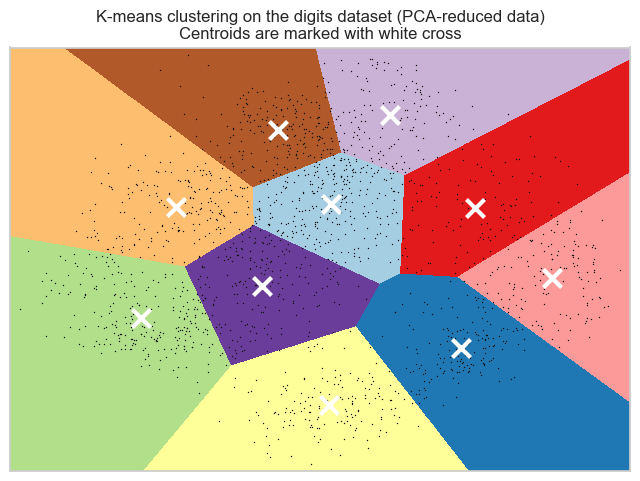

In [19]:


# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(());

## Intercluster Distance Maps

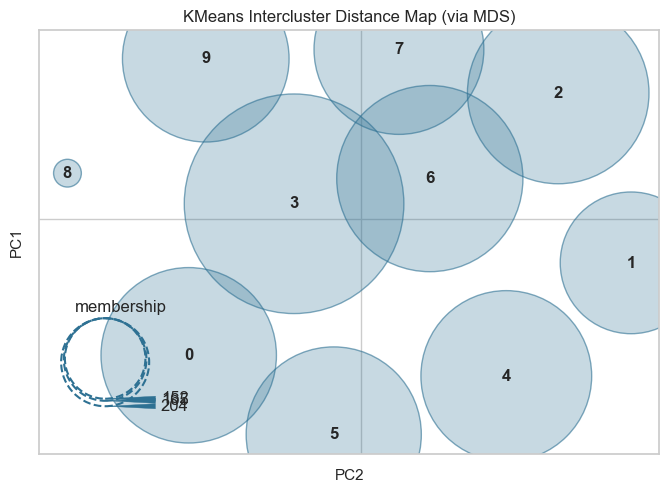

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [20]:
# Instantiate the clustering model and visualizer
model = KMeans(10)
visualizer = InterclusterDistance(model)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

## Visualisation with TSNE

In [21]:
from sklearn.manifold import TSNE

In [22]:
# Initialize

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)


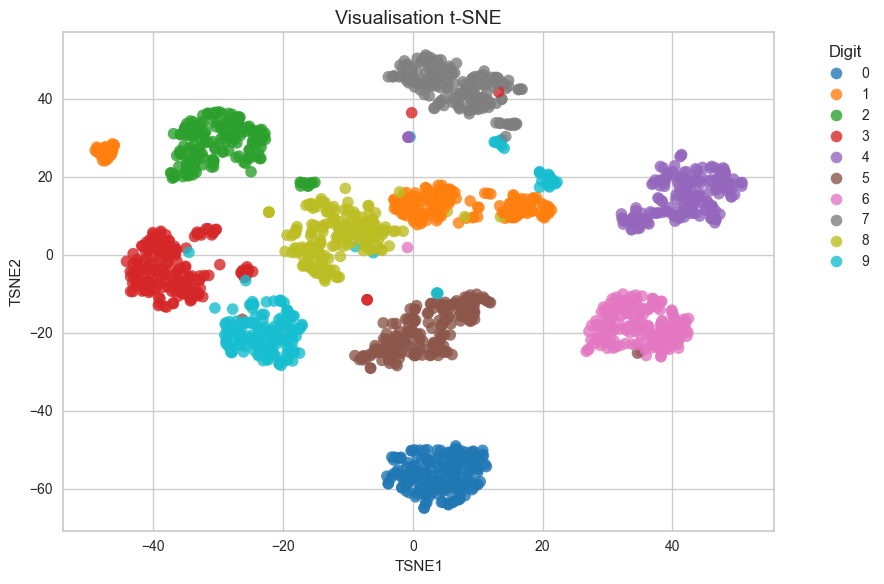

In [23]:
df_tsne = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
df_tsne['label'] = labels # Conversion en string pour une discrétisation catégorielle

# Plot
plt.figure(figsize=(9, 6))
sns.scatterplot(
    data=df_tsne,
    x='TSNE1',
    y='TSNE2',
    hue='label',
    palette='tab10',
    alpha=0.8,
    s=70,
    edgecolor='none'
)
plt.title('Visualisation t-SNE', fontsize=14)
plt.legend(title='Digit', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# **TP Clustering**

- Optimiser k-means avec au moins 3 hyperparametres (nombre de clusters, etc)
- Tester l'optimisation avec ou sans réduction de dimension (Avec ou sans PCA)
- Tester avec ou sans standardisation (Minmax, Standardscaller, Robustscaller)
- Faire l'analyse des personnas pour le meilleur modèle
- Montrer la visualisation et l'analyse des clusters choisies (Avec t-sne par exemple)

*Objet* : **TPISE-Clustering 2025**

**Jeudi 22/05/2025 à 18h00**


# **OPTIMISATIN DE K-MEANS**

## Importation des packages necessaires 

In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score, homogeneity_score, completeness_score, v_measure_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from itertools import product
import pandas as pd

## Donnees

In [ ]:
X, y = digits.data, digits.target

## Definition de la fonction pour l'optimisation des hyperparametres

**On choisit d'utiliser le score de ARI comme metrique d'optimisation puisque l'on dispose des vrais labels et la metrique de ARI est plus adaptee dans ce cas**

In [30]:
def optimize_kmeans(X, y, n_clusters_list, n_init_list, tol_list, random_state=42):
    """
    Notre fonction recherche les meilleurs hyperparametres pour l'algorithme K-Means en utilisant l'ARI comme metrique d'evaluation
    
    Parameters
    ----------
    X : array-lik
        Donnees de depart
    
    y : array-like
        Labels de depart
    
    n_clusters_list : list of int
        Liste des valeurs a tester pour le nombre de clusters (n_clusters).
    
    n_init_list : list of int
        Liste des valeurs a tester pour le nombre d'initialisations differentes du centroid (n_init)
    
    tol_list : list of float
        Liste des valeurs e tester pour la tolerance de convergence (tol)

    Returns
    -------
    best_params : tuple
        (n_clusters, n_init, tol) qui maximise l'ARI.

    metrics : dict
        Dictionnaire contenant toutes les métriques associées aux meilleurs hyperparamètres :
        - 'ARI'
        - 'Silhouette'
        - 'Homogeneity'
        - 'Completeness'
        - 'V-measure'
    """
    best_ari = -1
    best_params = None
    best_metrics = {}

    for n_clusters, n_init, tol in product(n_clusters_list, n_init_list, tol_list):
        model = KMeans(n_clusters=n_clusters, n_init=n_init, tol=tol, random_state=random_state)
        y_pred = model.fit_predict(X)

        ari = adjusted_rand_score(y, y_pred)

        if ari > best_ari:
            best_ari = ari
            best_params = (n_clusters, n_init, tol)
            best_metrics = {
                'ARI': ari,
                'Silhouette': silhouette_score(X, y_pred),
                'Homogeneity': homogeneity_score(y, y_pred),
                'Completeness': completeness_score(y, y_pred),
                'V-measure': v_measure_score(y, y_pred)
            }

    return best_params, best_metrics


## Implementation avec/sans PCA et avec/sans stardardisation

**On va creer un tableau qui va nous afficher les differents resultats avec/sans PCA (avec 99% de l'inertie expliquee) et avec/sans stardardisation**

**Comme parametres d'optimisation, nous choisissons le nombre de clusters, le nombre d'iteration et la tolerance. Nous n'utilisons pas la methode d'initialisation (pour le choix des premiers centroid) car la methode k-means++ donne en general des meilleurs scores**

- **Pour le nombre de clusters, nous choisissons comme base pour l'optimisation 8, 9, 10, 11 et 12 en nous basant sur la courbe plus haut**

- **Pour le nombre d'iterations, nous choisissons comme base pour l'optimisation 5, 10 et 20**

- **Pour la tolerance, nous choisissons comme base pour l'optimisation 1e-3, et 1e-6**

In [32]:
scalers = {
    "None": None,
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler()
}

results = []

for scaler_name, scaler in scalers.items():
    for use_pca in [False, True]:
        X_transformed = X.copy()
        if scaler is not None:
            X_transformed = scaler.fit_transform(X_transformed)
        if use_pca:
            X_transformed = PCA(n_components=0.99, random_state=42).fit_transform(X_transformed)

        best_params, metrics = optimize_kmeans(
            X_transformed, labels,
            n_clusters_list=[8, 9, 10, 11, 12],
            n_init_list=[5, 10, 20],
            tol_list=[1e-3, 1e-6]
        )

        results.append({
            "Scaler": scaler_name,
            "PCA": use_pca,
            "Best Params": best_params,
            "ARI": metrics['ARI'],
            "Silhouette": metrics['Silhouette'],
            "Homogeneity": metrics['Homogeneity'],
            "Completeness": metrics['Completeness'],
            "V-measure": metrics['V-measure']
        })

results_df = pd.DataFrame(results)
results_df.sort_values(by="ARI", ascending=False, inplace=True)
results_df.reset_index(drop=True, inplace=True)
results_df



,Scaler,PCA,Best Params,ARI,Silhouette,Homogeneity,Completeness,V-measure
0,None,True,"(11, 5, 0.001)",0.741680,0.186477,0.797592,0.771973,0.784573
1,MinMaxScaler,False,"(11, 20, 0.001)",0.734033,0.181390,0.791361,0.766745,0.778859
2,None,False,"(11, 5, 0.001)",0.730251,0.182594,0.790511,0.764924,0.777507
3,MinMaxScaler,True,"(11, 10, 0.001)",0.725047,0.183432,0.783844,0.758927,0.771184
4,StandardScaler,True,"(11, 20, 0.001)",0.557205,0.159384,0.682294,0.698159,0.690135
5,StandardScaler,False,"(11, 5, 0.001)",0.557071,0.148338,0.673130,0.712923,0.692456
6,RobustScaler,False,"(12, 10, 0.001)",0.292835,0.138457,0.435347,0.445666,0.440446
7,RobustScaler,True,"(12, 5, 0.001)",0.286925,0.142400,0.420893,0.431748,0.426252


Les meilleurs score de ARI (0.742) et silhouette (0.1865) sont obtenus avec **11 clusters** **avec PCA** et **sans stardardisation**

## Sauvegarde du meilleur modele et choix des personnas

**Maintenant on va reentrainer le meilleur modele, extraire les predictions de labels et faire une analyse des personnas**

In [ ]:
best_result = results_df.iloc[0]
best_scaler_name = best_result["Scaler"]
best_pca_used = best_result["PCA"]
best_params = best_result["Best Params"]

X_best = X.copy()
if best_scaler_name != "None":
    scaler = scalers[best_scaler_name]
    X_best = scaler.fit_transform(X_best)
if best_pca_used:
    pca = PCA(n_components=0.99, random_state=42)
    X_best = pca.fit_transform(X_best)

n_clusters, n_init, tol = best_params
print(best_params)
best_kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, tol=tol, random_state=42)
cluster_labels = best_kmeans.fit_predict(X_best)
data_with_clusters = data.copy()  # ou ton DataFrame d'origine
data_with_clusters["Cluster_opt"] = cluster_labels



(11, 5, 0.001)


In [35]:
contingency_table = pd.crosstab(data_with_clusters["Cluster_opt"], data_with_clusters["label"])
contingency_table

label,0,1,2,3,4,5,6,7,8,9
Cluster_opt,,,,,,,,,,
0,0,24,147,1,0,0,0,0,2,0
1,0,0,1,7,0,40,0,0,3,143
2,0,0,13,7,1,0,1,0,142,2
3,0,2,0,0,0,2,176,0,1,0
4,0,54,2,0,7,0,0,2,4,20
5,177,0,1,0,0,0,1,0,0,0
6,0,100,1,1,5,0,3,2,15,0
7,1,0,0,0,160,2,0,0,0,0
8,0,1,10,158,0,1,0,0,0,2


In [38]:
major_digit = contingency_table.idxmax(axis=1)
major_digit

Cluster_opt
0     2
1     9
2     8
3     6
4     1
5     0
6     1
7     4
8     3
9     5
10    7
dtype: int64

On a deux fois le chiffre 1 (clusters 4 et 6), donc le modele n'arrive pas a bien distinguer le chiffre 1. Le reste des chiffres sont bien representes et le modele parviens a bien les differentier.

**On pourrais fusionner ces deux clusters au moment des analyses**

## Visualisations

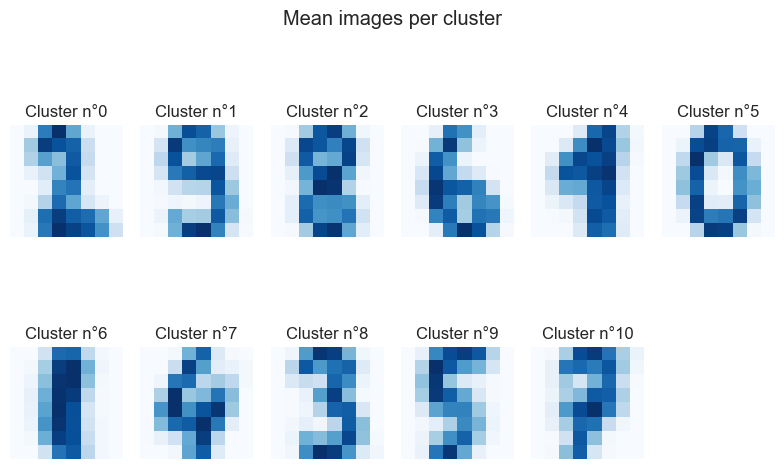

In [51]:
for cluster_id in range(n_clusters):
    cluster_indices = np.where(best_kmeans.labels_ == cluster_id)
    cluster_images = X[cluster_indices]
    mean_image = cluster_images.mean(axis=0).reshape(8, 8)

    plt.subplot(2, 6, cluster_id + 1)
    plt.imshow(mean_image, cmap='Blues')
    plt.title(f"Cluster n°{cluster_id}")
    plt.axis('off')

plt.suptitle("Mean images per cluster")
plt.tight_layout()
plt.show()

On remarque que le cluster 4 semble plus cerner le chiffre 1 que le cluster 6 ou visuellement il n'est pas possible de distinguer le chiffre. Les autres chiffres sont assez visibles.

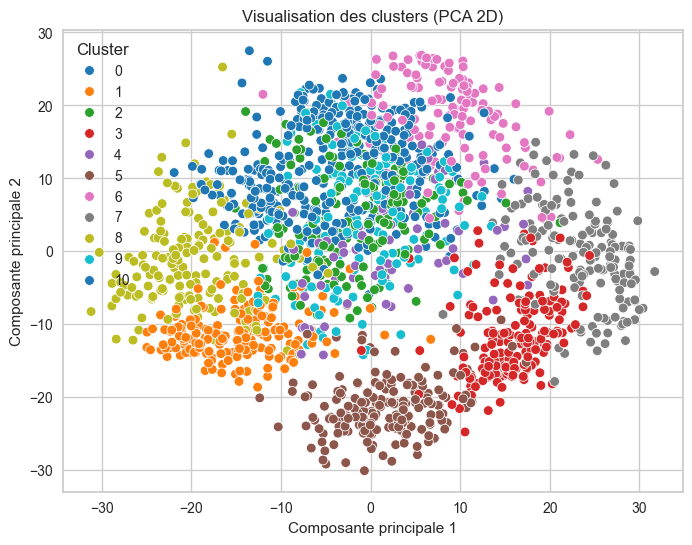

In [46]:
pca_visu = PCA(n_components=2, random_state=42)
reduced_data = pca_visu.fit_transform(X_best)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=reduced_data[:, 0],
    y=reduced_data[:, 1],
    hue=cluster_labels,
    palette='tab10',
    legend='full'
)
plt.title("Visualisation des clusters (PCA 2D)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


On remarque une fort intersection entre les clusters 0, 2, 9 et 10. Mais cela peut etre du au fait que l'ACP ne permet pas d'avoir une bonne representation de ces clusters d'autant plus qu'oon ne regarde qu'a travers deux dimensions

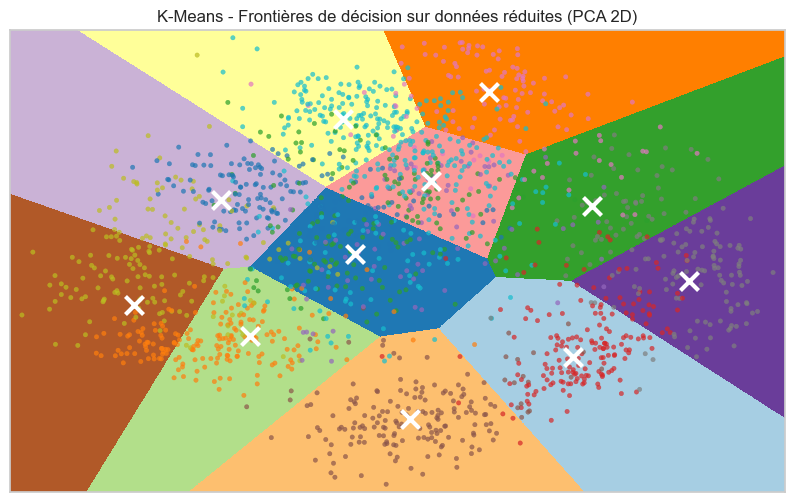

In [48]:
kmeans_2d = KMeans(
    n_clusters=best_kmeans.n_clusters,
    n_init=best_kmeans.n_init,
    tol=best_kmeans.tol,
    random_state=42
)
kmeans_2d.fit(reduced_data)

h = 0.02 
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = kmeans_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower"
)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap=plt.cm.tab10, s=10, alpha=0.7)

centroids = kmeans_2d.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker='x',
    s=169,
    linewidths=3,
    color='white',
    zorder=10
)

plt.title("K-Means - Frontières de décision sur données réduites (PCA 2D)")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()


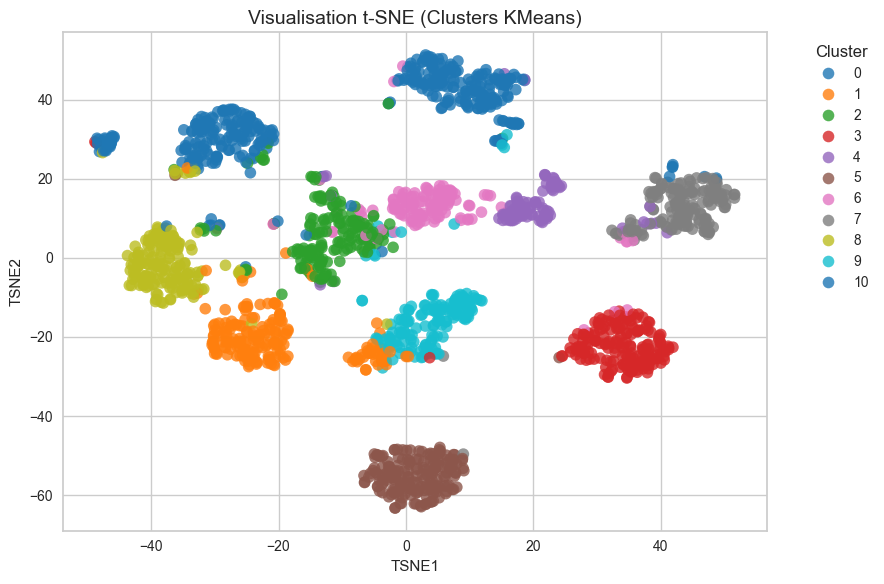

In [52]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_best)

df_tsne = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
df_tsne['Cluster'] = best_kmeans.labels_  

plt.figure(figsize=(9, 6))
sns.scatterplot(
    data=df_tsne,
    x='TSNE1',
    y='TSNE2',
    hue='Cluster',
    palette='tab10',
    alpha=0.8,
    s=70,
    edgecolor='none'
)
plt.title('Visualisation t-SNE (Clusters KMeans)', fontsize=14)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


On parviens a mieux visualiser les differents clusters